# The Support Vector Machine (SVM) Algorithm
### and Grid Search

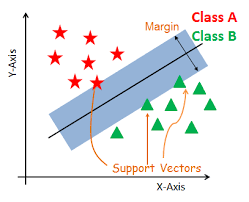

The Support Vector Machine (SVM) algorithm is a supervised machine learning model used for classification and regression tasks. It is particularly effective in high-dimensional spaces and situations where the number of dimensions exceeds the number of samples. The primary goal of SVM is to find the best separating hyperplane that divides the dataset into classes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import PyQt5 
%matplotlib qt

In [2]:
from sklearn.datasets import load_breast_cancer

# Load the iris dataset
Bcancer = load_breast_cancer()

In [3]:
type(Bcancer)

sklearn.utils._bunch.Bunch

In [4]:
Bcancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(Bcancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
data_x=pd.DataFrame(Bcancer['data'],columns=Bcancer['feature_names'])

data_x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
data_x.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [10]:
data_target=pd.DataFrame(Bcancer['target'],columns=['cancer'])
data_target.value_counts()

cancer
1         357
0         212
dtype: int64

In [11]:
X = data_x
y = data_target

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)



# Create an SVM classifier
# from sklearn.svm import SVC  # SVC:Support Vector classification & SVR: Support Vector Regresion

from sklearn import svm

# rbfmodel = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
# polymodel = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)
SVMModel = svm.SVC().fit(X_train, y_train)

# Make predictions
# poly_pred = polymodel.predict(X_test)
# rbf_pred = rbfmodel.predict(X_test)
SVM_pred=SVMModel.predict(X_test)


# Calculate accuracy
from sklearn.metrics import accuracy_score,f1_score

svm_accuracy = accuracy_score(y_test,SVM_pred)
svm_f1 = f1_score(y_test, SVM_pred, average='weighted')
print('Accuracy SVM : ', "%.2f" % (svm_accuracy*100))
print('F1 SVM: ', "%.2f" % (svm_f1*100))

# print("-"*30)
# rbf_accuracy = accuracy_score(y_test, rbf_pred)
# rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
# print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
# print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))


Accuracy SVM :  92.40
F1 SVM:  92.31


c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
from sklearn.metrics import confusion_matrix,classification_report
# print("Evaluation Metrics For SVM (PolyModel): \n")
# print(f"confusion matrix:\n{confusion_matrix(y_test,poly_pred)}")
# print("."*30)
# print(f"classification report:\n{classification_report(y_test,poly_pred)}")
# print("-"*60)
# print(f"SVM score :{polymodel.score(X_test,y_test)}")


print("Evaluation Metrics For SVM : \n")
confus=confusion_matrix(y_test,SVM_pred)
print(f"confusion matrix:\n{confus}")
sns.heatmap(confus,annot=True)
print("."*30)
print(f"classification report:\n{classification_report(y_test,SVM_pred)}")
print("-"*60)
print(f"SVM score :{SVMModel.score(X_test,y_test)}")

Evaluation Metrics For SVM : 

confusion matrix:
[[ 56  10]
 [  3 102]]
..............................
classification report:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171

------------------------------------------------------------
SVM score :0.9239766081871345


In [ ]:
# print("Evaluation Metrics For SVM (RBFModel): \n")
# print(f"confusion matrix:\n{confusion_matrix(y_test,rbf_pred)}")
# print("."*30)
# print(f"classification report:\n{classification_report(y_test,rbf_pred)}")
# print("."*30)
# print(f"SVM score :{rbfmodel.score(X_test,y_test)}")

In [ ]:
# df_poly=pd.DataFrame({'Labels':y_test,"Predictions_poly":poly_pred})
# print('df_poly:\n',df_poly)
# df_rbf=pd.DataFrame({'Labels':y_test,"Predictions_RBF":rbf_pred})
# print('df_rbf:\n',df_rbf)



# Grid Search

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100],'gamma': [0.01, 0.1, 1, 10]}


# Instantiate the SVM classifier
svm = SVC()

# Instantiate the GridSearchCV object
# grid_search = GridSearchCV(svm, param_grid, cv=5)
grid=GridSearchCV(svm,param_grid,refit=True,verbose=3)


# Fit the GridSearchCV object to the training data
# grid_search.fit(X, y)
grid.fit(X, y)

print("Best hyperparameters:", grid.best_params_)
print("Best accuracy score:", grid.best_score_)

pred=grid.predict(X_test)
print("grid score:", grid.score(X_test,y_test))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.623 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01;, score=0.623 total time=   0.0s
[CV 3/5] END .................C=0.1, gamma=0.01;, score=0.632 total time=   0.0s
[CV 4/5] END .................C=0.1, gamma=0.01;, score=0.632 total time=   0.0s


c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 5/5] END .................C=0.1, gamma=0.01;, score=0.628 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.623 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.623 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.632 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.632 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.628 total time=   0.0s


c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 1/5] END ....................C=0.1, gamma=1;, score=0.623 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.623 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.632 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.632 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.628 total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=10;, score=0.623 total time=   0.0s


c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 2/5] END ...................C=0.1, gamma=10;, score=0.623 total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=10;, score=0.632 total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=10;, score=0.632 total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=10;, score=0.628 total time=   0.0s
[CV 1/5] END ...................C=1, gamma=0.01;, score=0.623 total time=   0.0s
[CV 2/5] END ...................C=1, gamma=0.01;, score=0.623 total time=   0.0s


c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 3/5] END ...................C=1, gamma=0.01;, score=0.632 total time=   0.0s
[CV 4/5] END ...................C=1, gamma=0.01;, score=0.632 total time=   0.0s
[CV 5/5] END ...................C=1, gamma=0.01;, score=0.619 total time=   0.0s
[CV 1/5] END ....................C=1, gamma=0.1;, score=0.623 total time=   0.0s
[CV 2/5] END ....................C=1, gamma=0.1;, score=0.623 total time=   0.0s
[CV 3/5] END ....................C=1, gamma=0.1;, score=0.632 total time=   0.0s


c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 4/5] END ....................C=1, gamma=0.1;, score=0.632 total time=   0.0s
[CV 5/5] END ....................C=1, gamma=0.1;, score=0.628 total time=   0.0s
[CV 1/5] END ......................C=1, gamma=1;, score=0.623 total time=   0.0s
[CV 2/5] END ......................C=1, gamma=1;, score=0.623 total time=   0.0s
[CV 3/5] END ......................C=1, gamma=1;, score=0.632 total time=   0.0s


c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 4/5] END ......................C=1, gamma=1;, score=0.632 total time=   0.0s
[CV 5/5] END ......................C=1, gamma=1;, score=0.628 total time=   0.0s
[CV 1/5] END .....................C=1, gamma=10;, score=0.623 total time=   0.0s
[CV 2/5] END .....................C=1, gamma=10;, score=0.623 total time=   0.0s
[CV 3/5] END .....................C=1, gamma=10;, score=0.632 total time=   0.0s
[CV 4/5] END .....................C=1, gamma=10;, score=0.632 total time=   0.0s
[CV 5/5] END .....................C=1, gamma=10;, score=0.628 total time=   0.0s


c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 1/5] END ..................C=10, gamma=0.01;, score=0.623 total time=   0.0s
[CV 2/5] END ..................C=10, gamma=0.01;, score=0.623 total time=   0.0s
[CV 3/5] END ..................C=10, gamma=0.01;, score=0.632 total time=   0.0s
[CV 4/5] END ..................C=10, gamma=0.01;, score=0.640 total time=   0.0s
[CV 5/5] END ..................C=10, gamma=0.01;, score=0.619 total time=   0.0s
[CV 1/5] END ...................C=10, gamma=0.1;, score=0.623 total time=   0.0s


c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 2/5] END ...................C=10, gamma=0.1;, score=0.623 total time=   0.0s
[CV 3/5] END ...................C=10, gamma=0.1;, score=0.632 total time=   0.0s
[CV 4/5] END ...................C=10, gamma=0.1;, score=0.632 total time=   0.0s
[CV 5/5] END ...................C=10, gamma=0.1;, score=0.628 total time=   0.0s
[CV 1/5] END .....................C=10, gamma=1;, score=0.623 total time=   0.0s


c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 2/5] END .....................C=10, gamma=1;, score=0.623 total time=   0.0s
[CV 3/5] END .....................C=10, gamma=1;, score=0.632 total time=   0.0s
[CV 4/5] END .....................C=10, gamma=1;, score=0.632 total time=   0.0s
[CV 5/5] END .....................C=10, gamma=1;, score=0.628 total time=   0.0s
[CV 1/5] END ....................C=10, gamma=10;, score=0.623 total time=   0.0s
[CV 2/5] END ....................C=10, gamma=10;, score=0.623 total time=   0.0s
[CV 3/5] END ....................C=10, gamma=10;, score=0.632 total time=   0.0s
[CV 4/5] END ....................C=10, gamma=10;, score=0.632 total time=   0.0s
[CV 5/5] END ....................C=10, gamma=10;, score=0.628 total time=   0.0s


c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 1/5] END .................C=100, gamma=0.01;, score=0.623 total time=   0.0s
[CV 2/5] END .................C=100, gamma=0.01;, score=0.623 total time=   0.0s
[CV 3/5] END .................C=100, gamma=0.01;, score=0.632 total time=   0.0s
[CV 4/5] END .................C=100, gamma=0.01;, score=0.640 total time=   0.0s
[CV 5/5] END .................C=100, gamma=0.01;, score=0.619 total time=   0.0s
[CV 1/5] END ..................C=100, gamma=0.1;, score=0.623 total time=   0.0s
[CV 2/5] END ..................C=100, gamma=0.1;, score=0.623 total time=   0.0s


c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 3/5] END ..................C=100, gamma=0.1;, score=0.632 total time=   0.0s
[CV 4/5] END ..................C=100, gamma=0.1;, score=0.632 total time=   0.0s
[CV 5/5] END ..................C=100, gamma=0.1;, score=0.628 total time=   0.0s
[CV 1/5] END ....................C=100, gamma=1;, score=0.623 total time=   0.0s
[CV 2/5] END ....................C=100, gamma=1;, score=0.623 total time=   0.0s
[CV 3/5] END ....................C=100, gamma=1;, score=0.632 total time=   0.0s


c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 4/5] END ....................C=100, gamma=1;, score=0.632 total time=   0.0s
[CV 5/5] END ....................C=100, gamma=1;, score=0.628 total time=   0.0s
[CV 1/5] END ...................C=100, gamma=10;, score=0.623 total time=   0.0s
[CV 2/5] END ...................C=100, gamma=10;, score=0.623 total time=   0.0s
[CV 3/5] END ...................C=100, gamma=10;, score=0.632 total time=   0.0s
[CV 4/5] END ...................C=100, gamma=10;, score=0.632 total time=   0.0s
[CV 5/5] END ...................C=100, gamma=10;, score=0.628 total time=   0.0s


c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

Best hyperparameters: {'C': 0.1, 'gamma': 0.01}
Best accuracy score: 0.6274181027790716
grid score: 0.6140350877192983
